# Classification Challenge

Wine experts can identify wines from specific vineyards through smell and taste, but the factors that give different wines their individual charateristics are actually based on their chemical composition.

In this challenge, you must train a classification model to analyze the chemical and visual features of wine samples and classify them based on their cultivar (grape variety).

> **Citation**: The data used in this exercise was originally collected by Forina, M. et al.
>
> PARVUS - An Extendible Package for Data Exploration, Classification and Correlation.
Institute of Pharmaceutical and Food Analysis and Technologies, Via Brigata Salerno,
16147 Genoa, Italy.
>
> It can be downloaded from the UCI dataset repository (Dua, D. and Graff, C. (2019). [UCI Machine Learning Repository]([http://archive.ics.uci.edu/ml). Irvine, CA: University of California, School of Information and Computer Science). 

## Explore the data

Run the following cell to load a CSV file of wine data, which consists of 12 numeric features and a classification label with the following classes:

- **0** (*variety A*)
- **1** (*variety B*)
- **2** (*variety C*)

In [1]:
import pandas as pd

# load the training dataset
data = pd.read_csv('data/wine.csv')
data.sample(10)

,Alcohol,Malic_acid,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color_intensity,Hue,OD280_315_of_diluted_wines,Proline,WineVariety
11,14.12,1.48,2.32,16.8,95,2.20,2.43,0.26,1.57,5.00,1.17,2.82,1280,0
169,13.40,4.60,2.86,25.0,112,1.98,0.96,0.27,1.11,8.50,0.67,1.92,630,2
62,13.67,1.25,1.92,18.0,94,2.10,1.79,0.32,0.73,3.80,1.23,2.46,630,1
12,13.75,1.73,2.41,16.0,89,2.60,2.76,0.29,1.81,5.60,1.15,2.90,1320,0
158,14.34,1.68,2.70,25.0,98,2.80,1.31,0.53,2.70,13.00,0.57,1.96,660,2
140,12.93,2.81,2.70,21.0,96,1.54,0.50,0.53,0.75,4.60,0.77,2.31,600,2
8,14.83,1.64,2.17,14.0,97,2.80,2.98,0.29,1.98,5.20,1.08,2.85,1045,0
166,13.45,3.70,2.60,23.0,111,1.70,0.92,0.43,1.46,10.68,0.85,1.56,695,2
156,13.84,4.12,2.38,19.5,89,1.80,0.83,0.48,1.56,9.01,0.57,1.64,480,2
36,13.28,1.64,2.84,15.5,110,2.60,2.68,0.34,1.36,4.60,1.09,2.78,880,0


Your challenge is to explore the data and train a classification model that achieves an overall *Recall* metric of over 0.95 (95%).

> **Note**: There is no single "correct" solution. A sample solution is provided in [03 - Wine Classification Solution.ipynb](03%20-%20Wine%20Classification%20Solution.ipynb).

## Train and evaluate a model

Add markdown and code cells as required to to explore the data, train a model, and evaluate the model's predictive performance.

In [2]:
data.info

<bound method DataFrame.info of      Alcohol  Malic_acid   Ash  Alcalinity  Magnesium  Phenols  Flavanoids  \
0      14.23        1.71  2.43        15.6        127     2.80        3.06   
1      13.20        1.78  2.14        11.2        100     2.65        2.76   
2      13.16        2.36  2.67        18.6        101     2.80        3.24   
3      14.37        1.95  2.50        16.8        113     3.85        3.49   
4      13.24        2.59  2.87        21.0        118     2.80        2.69   
..       ...         ...   ...         ...        ...      ...         ...   
173    13.71        5.65  2.45        20.5         95     1.68        0.61   
174    13.40        3.91  2.48        23.0        102     1.80        0.75   
175    13.27        4.28  2.26        20.0        120     1.59        0.69   
176    13.17        2.59  2.37        20.0        120     1.65        0.68   
177    14.13        4.10  2.74        24.5         96     2.05        0.76   

     Nonflavanoids  Proanthocya

In [3]:
data.columns

Index(['Alcohol', 'Malic_acid', 'Ash', 'Alcalinity', 'Magnesium', 'Phenols',
       'Flavanoids', 'Nonflavanoids', 'Proanthocyanins', 'Color_intensity',
       'Hue', 'OD280_315_of_diluted_wines', 'Proline', 'WineVariety'],
      dtype='object')

## Use the model with new data observation

When you're happy with your model's predictive performance, save it and then use it to predict classes for the following two new wine samples:

- \[13.72,1.43,2.5,16.7,108,3.4,3.67,0.19,2.04,6.8,0.89,2.87,1285\]
- \[12.37,0.94,1.36,10.6,88,1.98,0.57,0.28,0.42,1.95,1.05,1.82,520\]


In [21]:
# Separate features and labels
features = ['Alcohol','Malic_acid','Ash','Alcalinity','Magnesium','Phenols','Flavanoids','Nonflavanoids','Proanthocyanins','Color_intensity','Hue','OD280_315_of_diluted_wines','Proline']
label = 'WineVariety'
X, y = data[features].values, data[label].values

for n in range(0,4):
    print("Wine", str(n+1), "\n  Features:",list(X[n]), "\n  Label:", y[n])

Wine 1 
  Features: [14.23, 1.71, 2.43, 15.6, 127.0, 2.8, 3.06, 0.28, 2.29, 5.64, 1.04, 3.92, 1065.0] 
  Label: 0
Wine 2 
  Features: [13.2, 1.78, 2.14, 11.2, 100.0, 2.65, 2.76, 0.26, 1.28, 4.38, 1.05, 3.4, 1050.0] 
  Label: 0
Wine 3 
  Features: [13.16, 2.36, 2.67, 18.6, 101.0, 2.8, 3.24, 0.3, 2.81, 5.68, 1.03, 3.17, 1185.0] 
  Label: 0
Wine 4 
  Features: [14.37, 1.95, 2.5, 16.8, 113.0, 3.85, 3.49, 0.24, 2.18, 7.8, 0.86, 3.45, 1480.0] 
  Label: 0


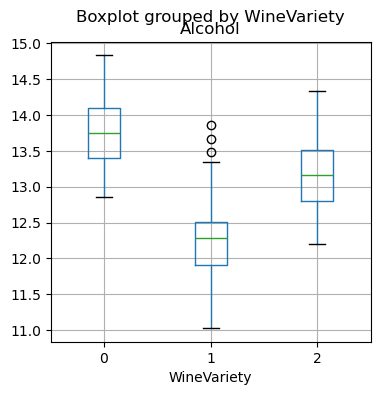

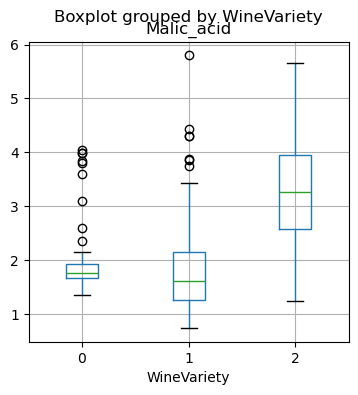

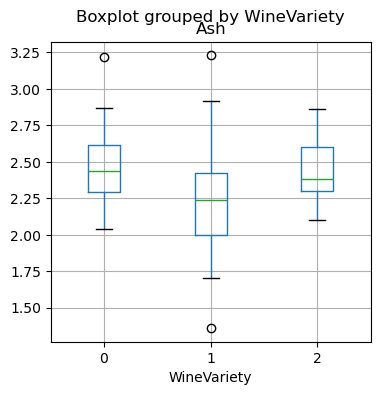

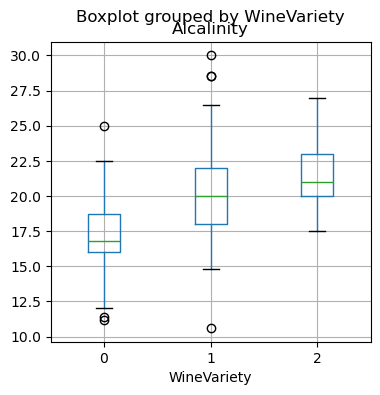

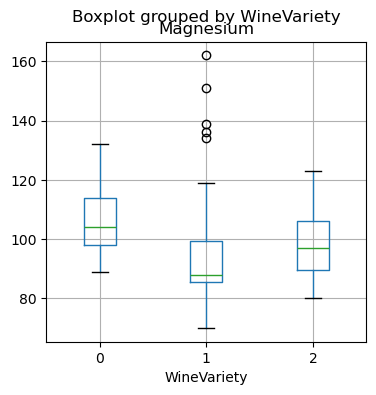

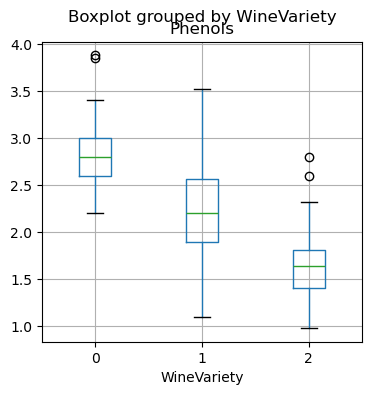

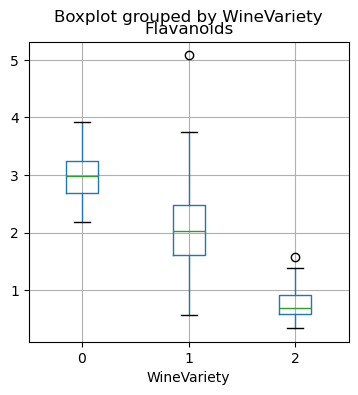

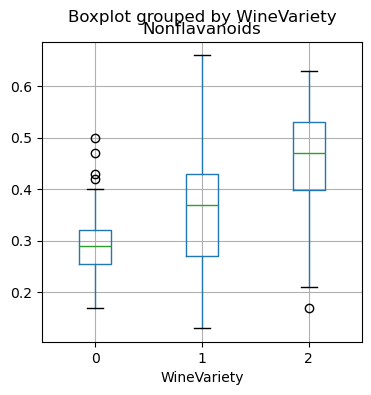

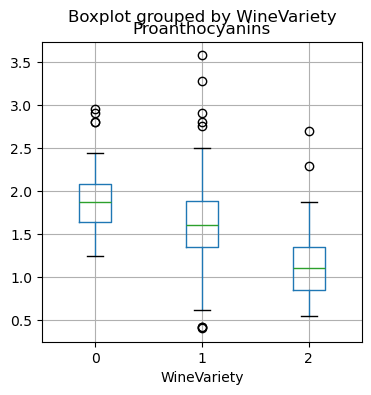

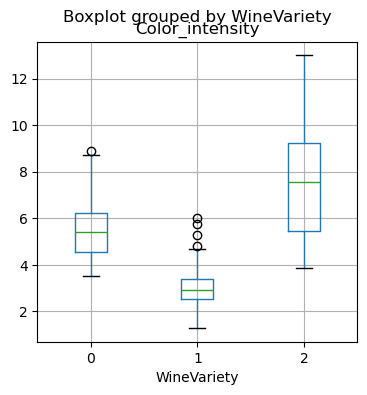

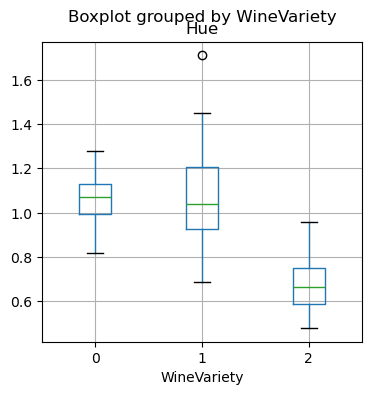

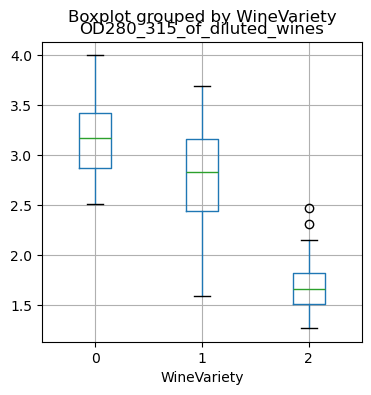

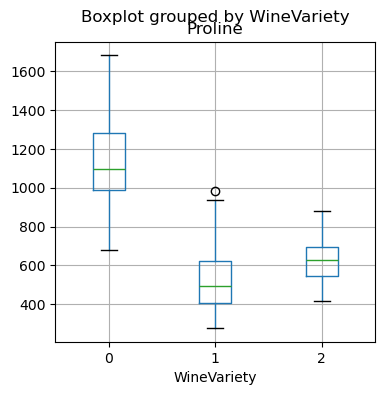

In [32]:
from matplotlib import pyplot as plt
%matplotlib inline

for col in features:
    data.boxplot(column=col, by=label, figsize=(4,4))
    plt.title(col)
plt.show()

In [34]:
from sklearn.model_selection import train_test_split

# Split data 70%-30% into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=100)

print ('Training cases: %d\nTest cases: %d' % (X_train.shape[0], X_test.shape[0]))

Training cases: 124
Test cases: 54


In [37]:
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression

# Define preprocessing for numeric columns (scale them)
feature_columns = [0,1,2,3,4,5,6,7,8,9,10,11,12]
feature_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
    ])

# Create preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('preprocess', feature_transformer, feature_columns)])

# Create training pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('regressor', LogisticRegression(solver='lbfgs', multi_class='auto'))])


# fit the pipeline to train a linear regression model on the training set
model = pipeline.fit(X_train, y_train)
print (model)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('preprocess',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9,
                                                   10, 11, 12])])),
                ('regressor', LogisticRegression(multi_class='auto'))])


/opt/anaconda3/envs/py-ml-env/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Overall Accuracy: 0.9629629629629629
Overall Precision: 0.9682539682539683
Overall Recall: 0.9696969696969697


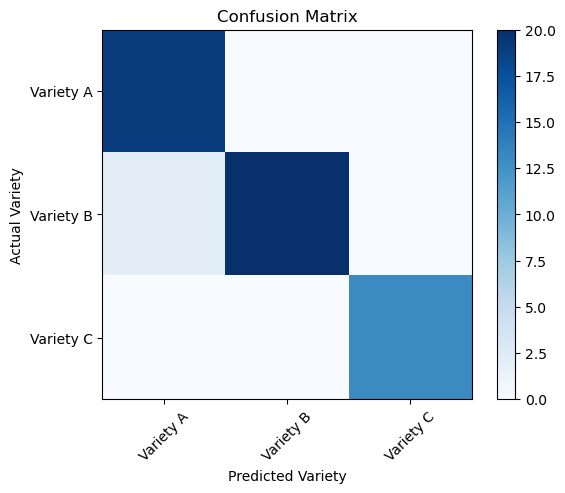

In [29]:
from sklearn. metrics import accuracy_score, precision_score, recall_score, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Get predictions from test data
predictions = model.predict(X_test)

# Get metrics
print("Overall Accuracy:",accuracy_score(y_test, predictions))
print("Overall Precision:",precision_score(y_test, predictions, average='macro'))
print("Overall Recall:",recall_score(y_test, predictions, average='macro'))

# Plot confusion matrix
cm = confusion_matrix(y_test, predictions)
classes = ['Variety A','Variety B','Variety C']
plt.imshow(cm, interpolation="nearest", cmap=plt.cm.Blues)
plt.colorbar()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)
plt.title('Confusion Matrix')
plt.xlabel("Predicted Variety")
plt.ylabel("Actual Variety")
plt.show()

Average AUC: 1.0


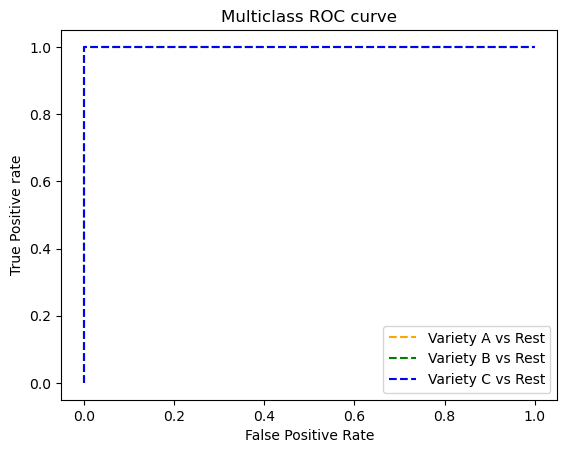

In [30]:
from sklearn.metrics import roc_curve, roc_auc_score

# Get class probability scores
probabilities = model.predict_proba(X_test)

auc = roc_auc_score(y_test,probabilities, multi_class='ovr')
print('Average AUC:', auc)

# Get ROC metrics for each class
fpr = {}
tpr = {}
thresh ={}
for i in range(len(classes)):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, probabilities[:,i], pos_label=i)
    
# Plot the ROC chart
plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label=classes[0] + ' vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label=classes[1] + ' vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label=classes[2] + ' vs Rest')
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.show()

In [31]:
import joblib

# Save the model as a pickle file
filename = './wine_classifer.pkl'
joblib.dump(model, filename)

# Load the saved model
model = joblib.load(filename)

# Get predictions for two new wine samples
x_new = np.array([[13.72,1.43,2.5,16.7,108,3.4,3.67,0.19,2.04,6.8,0.89,2.87,1285],
                  [12.37,0.94,1.36,10.6,88,1.98,0.57,0.28,0.42,1.95,1.05,1.82,520]])

# Call the web service, passing the input data
predictions = model.predict(x_new)

# Get the predicted classes.
for prediction in predictions:
    print(prediction, '(' + classes[prediction] +')')

0 (Variety A)
1 (Variety B)
